In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score,accuracy_score

In [3]:
df = pd.read_csv("car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.duplicated().sum()

2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
print(df['Car_Name'].value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


<Axes: xlabel='Fuel_Type'>

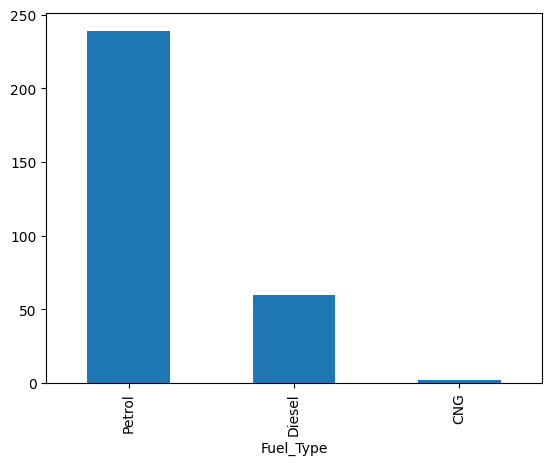

In [10]:
df['Fuel_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Seller_Type'>

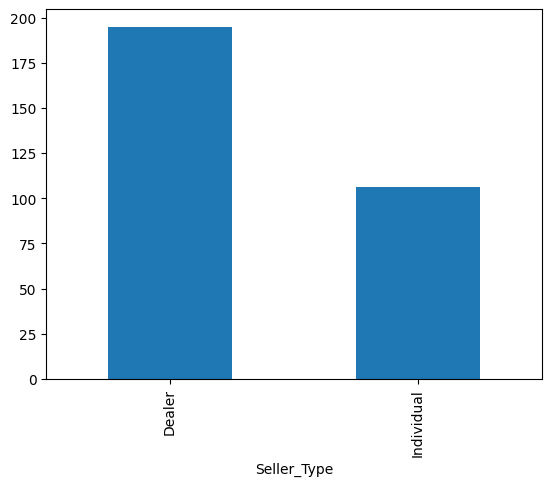

In [13]:
df['Seller_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Transmission'>

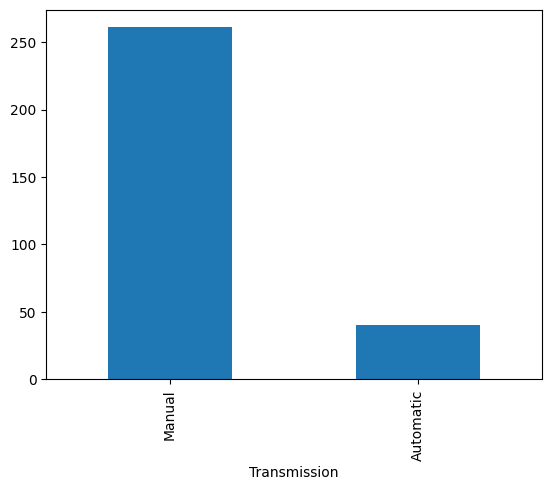

In [14]:
df['Transmission'].value_counts().plot(kind='bar')

****Encoding****

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
df['Fuel_Type'] = encoder.fit_transform(df['Fuel_Type'])

In [19]:
df['Fuel_Type'].value_counts()

Fuel_Type
2    239
1     60
0      2
Name: count, dtype: int64

In [20]:
df['Seller_Type'] = encoder.fit_transform(df['Seller_Type'])

In [21]:
df['Seller_Type'].value_counts()

Seller_Type
0    195
1    106
Name: count, dtype: int64

In [22]:
df['Transmission'] = encoder.fit_transform(df['Transmission'])

In [23]:
df['Transmission'].value_counts()

Transmission
1    261
0     40
Name: count, dtype: int64

In [24]:
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
122,Royal Enfield Bullet 350,2016,1.05,1.17,6000,2,1,1,0
254,city,2013,5.25,9.90,54242,2,0,1,0
33,ertiga,2014,6.00,9.95,45000,1,0,1,0
235,verna,2017,9.10,9.40,15141,2,0,1,0
176,Honda Karizma,2011,0.35,1.05,30000,2,1,1,0
139,Bajaj Avenger 220 dtsi,2015,0.60,0.95,16600,2,1,1,0
129,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,2,1,1,0
14,dzire,2009,2.25,7.21,77427,2,0,1,0
124,Royal Enfield Classic 500,2012,0.95,1.75,11500,2,1,1,0
25,swift,2011,3.00,4.99,20000,2,0,1,0


# Split Data into Train and Test

In [25]:
X = df.drop(columns=["Car_Name","Selling_Price"],axis=1)
y = df['Selling_Price']

In [26]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [29]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(270, 7) (31, 7) (270,) (31,)


# Model Training

### LinearRegression

In [30]:
model1 = LinearRegression()

In [32]:
# predictions on training data
model1.fit(X_train,Y_train)
training_data_predication = model1.predict(X_train)
print("R2Score: ",r2_score(Y_train,training_data_predication))

R2Score:  0.87994516604937


In [ ]:
# Predicitions on Test data

In [35]:
testing_data_prediction = model1.predict(X_test)
print("R2score: ",r2_score(Y_test,testing_data_prediction))

R2score:  0.8365766715025347


### Lasso Regression

In [37]:
ls = Lasso()

In [38]:
ls.fit(X_train,Y_train)

Lasso()

In [39]:
ypred = ls.predict(X_test)

In [41]:
print("R2score:",r2_score(Y_test,ypred))

R2score: 0.8709167941173195


In [42]:
from xgboost import XGBRegressor

In [43]:
xgb_regressor = XGBRegressor()

In [44]:
xgb_regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
ypred= xgb_regressor.predict(X_test)
ypred_train = xgb_regressor.predict(X_train)

In [80]:
print("R2Score on Testing Data")
print("r2score on xgboost : ",r2_score(Y_test,ypred))

R2Score on Testing Data
r2score on xgboost :  0.9807321370840111


In [79]:
print("R2Score on Training Data")
print("r2score on xgboost : ",r2_score(Y_train,ypred_train))

R2Score on Training Data
r2score on xgboost :  0.9999896680984235


In [81]:
xgb_regressor.predict(X_test)

array([ 8.792246  ,  0.49586606,  3.9864168 ,  3.0625799 , 10.641794  ,
        4.725404  ,  3.3360581 ,  6.7096004 ,  0.21394286,  5.752082  ,
        7.4469604 ,  4.415965  ,  0.41236195,  8.60621   ,  2.4452617 ,
        0.8416189 ,  0.679435  ,  0.44924533,  9.9373455 ,  4.0144978 ,
        1.4115442 ,  8.295046  ,  0.3994166 ,  9.390619  ,  0.6561221 ,
        6.9745398 ,  0.71781   ,  0.16392803,  3.077301  ,  2.2207417 ,
        0.4504009 ], dtype=float32)

In [82]:
Y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64